<a href="https://colab.research.google.com/github/carlosenriquez/EJERCICIO-WS-FECHAS/blob/master/AgentePeliculas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors

In [153]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [154]:
data=pd.read_csv('/content/drive/MyDrive/AgenteBusqueda/peliculas_a.csv')

In [155]:

preferencias_por_edad = {}

agrupa=pd.DataFrame()
agrupa['Accion']=data.groupby(by='edad')['Accion'].sum()
agrupa['Drama']=data.groupby(by='edad')['Drama'].sum()
agrupa['Romance']=data.groupby(by='edad')['Romance'].sum()
agrupa['Ciencia ficcion']=data.groupby(by='edad')['Ciencia ficcion'].sum()
agrupa['Historica']=data.groupby(by='edad')['Historica'].sum()
agrupa['edad'] = data.groupby(by='edad').sum().index

agrupado = data.groupby('edad', as_index=False).mean()


Text(0, 0.5, 'Número de Películas')

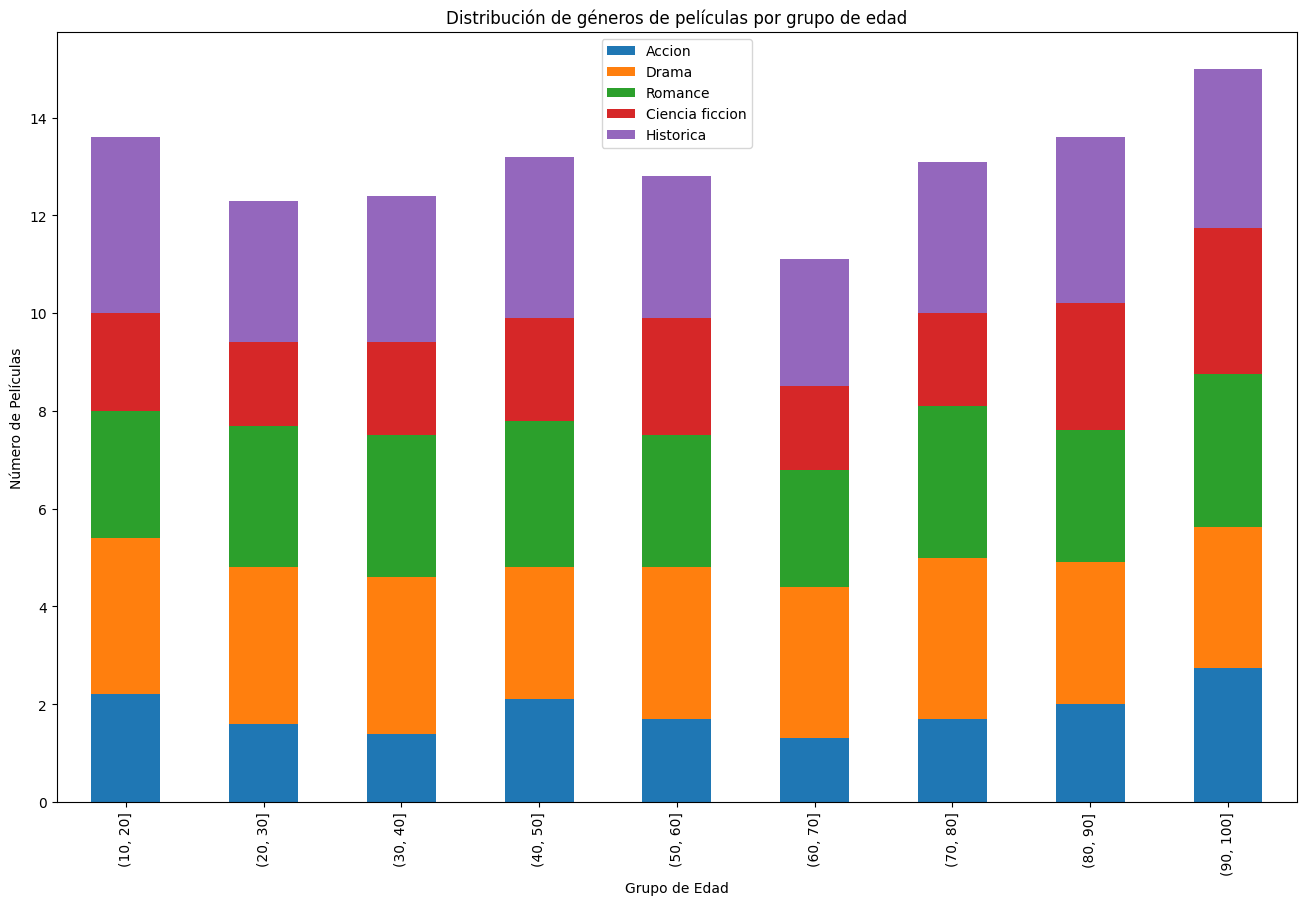

In [156]:
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = [f'{bins[i]}-{bins[i+1]-1}' for i in range(len(bins)-1)]
data_grouped = data.groupby(pd.cut(agrupado['edad'], bins=bins)).mean()
data_grouped = data_grouped[['Accion', 'Drama', 'Romance', 'Ciencia ficcion', 'Historica']]
fig, ax = plt.subplots(figsize=(16, 10))
data_grouped.plot(kind='bar', stacked=True, ax=ax)
plt.title('Distribución de géneros de películas por grupo de edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Número de Películas')

In [157]:
data_grouped

,Accion,Drama,Romance,Ciencia ficcion,Historica
edad,,,,,
"(10, 20]",2.20,3.200,2.600,2.0,3.60
"(20, 30]",1.60,3.200,2.900,1.7,2.90
"(30, 40]",1.40,3.200,2.900,1.9,3.00
"(40, 50]",2.10,2.700,3.000,2.1,3.30
"(50, 60]",1.70,3.100,2.700,2.4,2.90
"(60, 70]",1.30,3.100,2.400,1.7,2.60
"(70, 80]",1.70,3.300,3.100,1.9,3.10
"(80, 90]",2.00,2.900,2.700,2.6,3.40
"(90, 100]",2.75,2.875,3.125,3.0,3.25


In [158]:
X = agrupado[['Accion','Drama','Romance','Ciencia ficcion','Historica']]
y = agrupado[['edad']]
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.30)
y_train = np.ravel(y_train)

In [159]:

# Crear y entrenar el clasificador KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
recomendacion = knn.predict(X_test)
edades=[]
edades = agrupado['edad']

In [160]:
recomendacion = knn.predict(X_test)

In [161]:

data_grouped = data.groupby(pd.cut(data['edad'], bins=bins)).sum()
valores_dict = {}

for numero in recomendacion:
    grupo = pd.cut([numero], bins=bins)
    indice_grupo = data_grouped.index.get_loc(grupo[0])
    valores = data_grouped.iloc[indice_grupo][['Accion', 'Drama', 'Romance', 'Ciencia ficcion','Historica']]
    valores_dict[numero] = valores

print("Valores en el diccionario:")
for numero, valores in valores_dict.items():
    print(f"Para la edad de: {numero}, se sugiere: {valores.to_dict()}")

Valores en el diccionario:
Para la edad de: 72, se sugiere: {'Accion': 92, 'Drama': 714, 'Romance': 503, 'Ciencia ficcion': 188, 'Historica': 523}
Para la edad de: 49, se sugiere: {'Accion': 678, 'Drama': 561, 'Romance': 678, 'Ciencia ficcion': 744, 'Historica': 795}
Para la edad de: 43, se sugiere: {'Accion': 678, 'Drama': 561, 'Romance': 678, 'Ciencia ficcion': 744, 'Historica': 795}
Para la edad de: 65, se sugiere: {'Accion': 305, 'Drama': 682, 'Romance': 576, 'Ciencia ficcion': 408, 'Historica': 647}
Para la edad de: 16, se sugiere: {'Accion': 288, 'Drama': 288, 'Romance': 288, 'Ciencia ficcion': 288, 'Historica': 288}
Para la edad de: 74, se sugiere: {'Accion': 92, 'Drama': 714, 'Romance': 503, 'Ciencia ficcion': 188, 'Historica': 523}
Para la edad de: 70, se sugiere: {'Accion': 305, 'Drama': 682, 'Romance': 576, 'Ciencia ficcion': 408, 'Historica': 647}
Para la edad de: 32, se sugiere: {'Accion': 657, 'Drama': 483, 'Romance': 657, 'Ciencia ficcion': 756, 'Historica': 831}
Para la

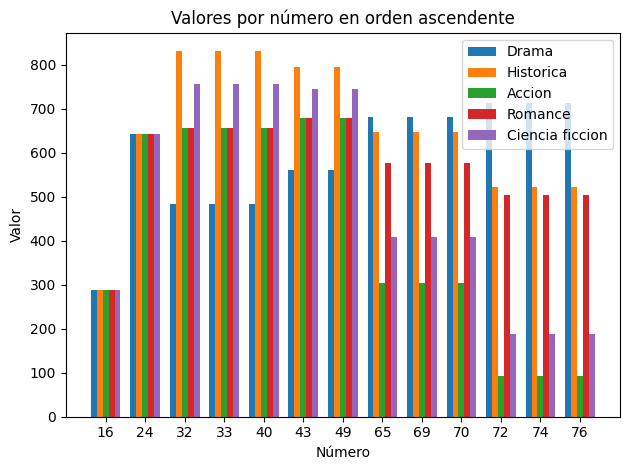

In [162]:
# Ordenar el diccionario por clave en orden ascendente
valores_ordenados = sorted(valores_dict.items())
numeros_ordenados, valores_ordenados = zip(*valores_ordenados)

# Obtener las categorías y sus valores ordenados
categorias = ['Drama', 'Historica', 'Accion', 'Romance', 'Ciencia ficcion']
valores_categorias = [[valores_dict[numero][categoria] for numero in numeros_ordenados] for categoria in categorias]

# Crear las coordenadas x para las barras
x = np.arange(len(numeros_ordenados))

# Definir el ancho de las barras
bar_width = 0.15

# Crear las barras para cada categoría
for i, categoria in enumerate(categorias):
    plt.bar(x + i * bar_width, valores_categorias[i], width=bar_width, label=categoria)

# Personalizar el gráfico
plt.title('Valores por número en orden ascendente')
plt.xlabel('Número')
plt.ylabel('Valor')
plt.legend()
plt.xticks(x + bar_width * 2, numeros_ordenados)  # Ajustar las etiquetas del eje x
plt.tight_layout()  # Ajustar el diseño del gráfico para evitar solapamiento
plt.show()